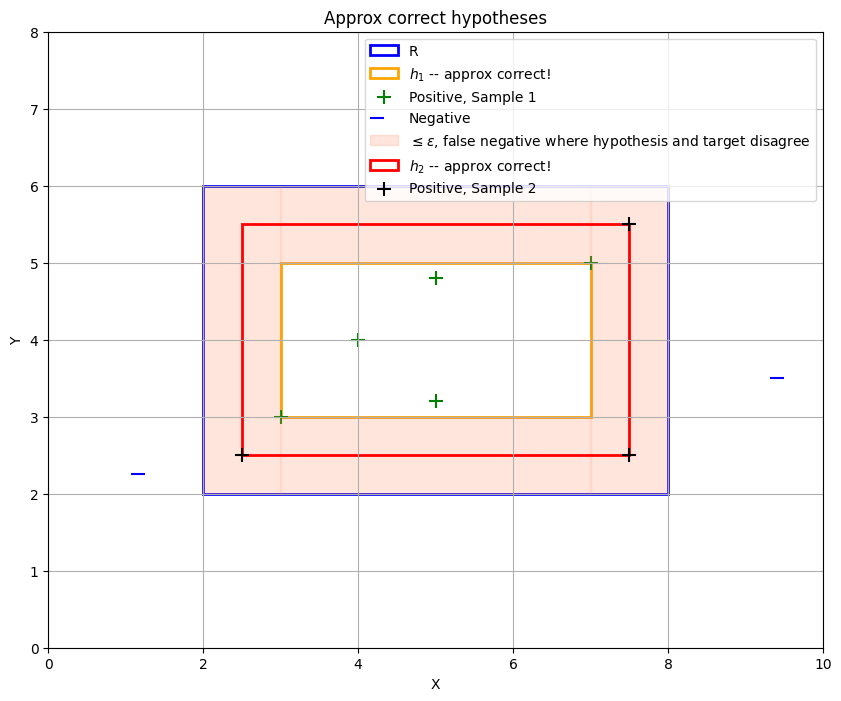

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Define the coordinates for rectangle R using 4 points
rect_R_coords = [(2, 2), (8, 2), (8, 6), (2, 6)]

# Define the coordinates for rectangle h (inside R) using 4 points
rect_h_coords = [(3, 3), (7, 3), (7, 5), (3, 5)]

# Define positive and negative data points
positive_points = [(3, 3), (4, 4), (7, 5), (5,3.2), (5,4.8)]
negative_points = [(1.25, 2.25), (9.5, 3.5)]

# Plot rectangle R in blue
rect_R = patches.Polygon(rect_R_coords, closed=True, linewidth=2, edgecolor='b', facecolor='none', label='R')
ax.add_patch(rect_R)

# Plot rectangle h inside R in orange
rect_h = patches.Polygon(rect_h_coords, closed=True, linewidth=2, edgecolor='orange', facecolor='none', label=r'$h_1$ -- approx correct!')
ax.add_patch(rect_h)

# Plot positive data points as '+' in green
ax.scatter([point[0] for point in positive_points], [point[1] for point in positive_points], color='g', marker='+', s=100, label='Positive, Sample 1')

# Plot negative data points as '-' in blue
ax.scatter([point[0] for point in negative_points], [point[1] for point in negative_points], color='b', marker=0, s=100, label='Negative')

X = np.linspace(rect_R_coords[0][0], rect_R_coords[1][0], 500)

# Fill between the top and bottom strips outside rectangle h
ax.fill_between(X, rect_R_coords[0][1], rect_R_coords[2][1], where=(X <= rect_h_coords[0][0]) | (X >= rect_h_coords[1][0]), color='coral', alpha=0.2, label=r'$\leq \epsilon$, false negative where hypothesis and target disagree')
ax.fill_between(X, rect_R_coords[0][1], rect_h_coords[0][1], where=(X >= rect_h_coords[0][0]) & (X <= rect_h_coords[1][0]), color='coral', alpha=0.2)
ax.fill_between(X, rect_h_coords[2][1], rect_R_coords[2][1], where=(X >= rect_h_coords[0][0]) & (X <= rect_h_coords[1][0]), color='coral', alpha=0.2)

# Draw a red rectangle around the inner rectangle
rect_inner_enlarged = patches.Polygon([(rect_h_coords[0][0] - 0.5, rect_h_coords[0][1] - 0.5),
                                       (rect_h_coords[1][0] + 0.5, rect_h_coords[1][1] - 0.5),
                                       (rect_h_coords[2][0] + 0.5, rect_h_coords[2][1] + 0.5),
                                       (rect_h_coords[3][0] - 0.5, rect_h_coords[3][1] + 0.5)],
                                      closed=True, linewidth=2, edgecolor='r', facecolor='none', label=r'$h_2$ -- approx correct!')
ax.add_patch(rect_inner_enlarged)

# Define the coordinates for rectangle h (inside R) using 4 points
rect_h_coords_2 = [(rect_h_coords[0][0] - 0.5, rect_h_coords[0][1] - 0.5),
                                       (rect_h_coords[1][0] + 0.5, rect_h_coords[1][1] - 0.5),
                                       (rect_h_coords[2][0] + 0.5, rect_h_coords[2][1] + 0.5)]

# Plot positive data points as '+' in green
ax.scatter([point[0] for point in rect_h_coords_2], [point[1] for point in rect_h_coords_2], color='black', marker='+', s=100, label='Positive, Sample 2')



# Set axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)

# Add legend with negative and positive only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = set(labels)
new_handles = [handle for handle, label in zip(handles, labels) if label in unique_labels]
new_labels = [label for label in labels if label in unique_labels]
ax.legend(new_handles, new_labels, loc=1)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Approx correct hypotheses')

# Show the plot
plt.grid(True)
plt.savefig('goodPAC.png')
plt.show()


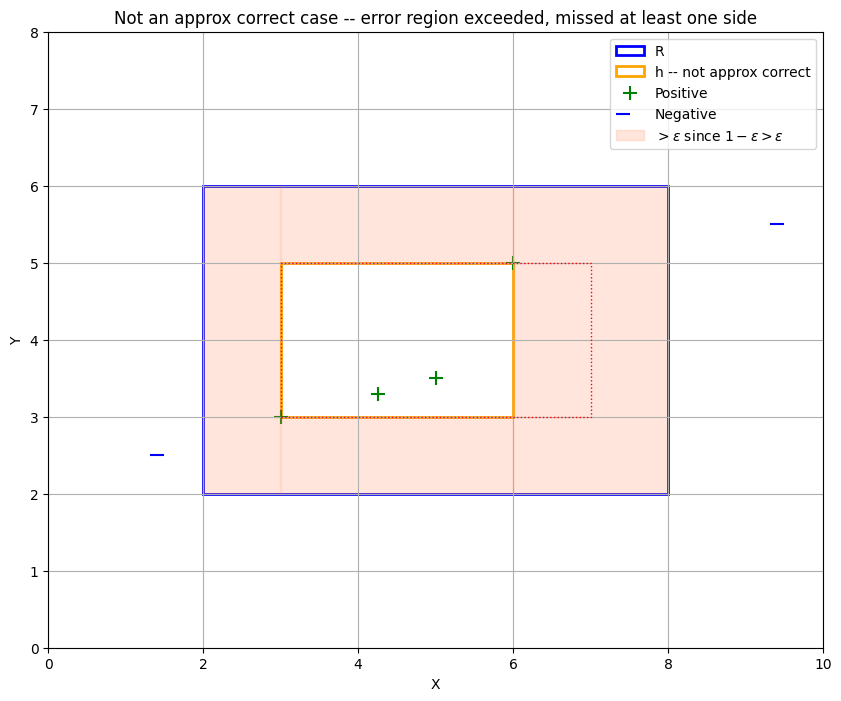

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Define the coordinates for rectangle R using 4 points
rect_R_coords = [(2, 2), (8, 2), (8, 6), (2, 6)]

# Define the coordinates for rectangle h before bad approx
rect_h_coords_orig = [(3, 3), (7, 3), (7, 5), (3, 5)]

# Define the coordinates for rectangle h (inside R) using 4 points for bad approx
rect_h_coords = [(3, 3), (6, 3), (6, 5), (3, 5)]  


# Define positive and negative data points
positive_points = [(3, 3), (5, 3.5), (6,5), (4.25, 3.3)]
negative_points = [(1.5, 2.5), (9.5, 5.5), (9,9.5)]

# Plot rectangle R in blue
rect_R = patches.Polygon(rect_R_coords, closed=True, linewidth=2, edgecolor='b', facecolor='none', label='R')
ax.add_patch(rect_R)

# Plot modified rectangle h inside R in orange
rect_h = patches.Polygon(rect_h_coords, closed=True, linewidth=2, edgecolor='orange', facecolor='none', label='h -- not approx correct')
ax.add_patch(rect_h)

# Plot positive data points as '+' in green
ax.scatter([point[0] for point in positive_points], [point[1] for point in positive_points], color='g', marker='+', s=100, label='Positive')

# Plot negative data points as '-' in blue
ax.scatter([point[0] for point in negative_points], [point[1] for point in negative_points], color='b', marker=0, s=100, label='Negative')

X = np.linspace(rect_R_coords[0][0], rect_R_coords[1][0], 500)

# Fill between the top and bottom strips outside modified rectangle h and inside red rectangle
ax.fill_between(X, rect_R_coords[0][1], rect_R_coords[2][1], where=(X <= rect_h_coords[0][0]) | (X >= rect_h_coords[1][0]), color='coral', alpha=0.2, label=r'$> \epsilon$ since $1-\epsilon > \epsilon$')
ax.fill_between(X, rect_h_coords[0][1], rect_R_coords[0][1], where=(X >= rect_h_coords[0][0]) & (X <= rect_h_coords[1][0]), color='coral', alpha=0.2)
ax.fill_between(X, rect_R_coords[2][1], rect_h_coords[2][1], where=(X >= rect_h_coords[0][0]) & (X <= rect_h_coords[1][0]), color='coral', alpha=0.2)

# Set axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)

# Add legend with negative and positive only once
handles, labels = ax.get_legend_handles_labels()
unique_labels = set(labels)
new_handles = [handle for handle, label in zip(handles, labels) if label in unique_labels]
new_labels = [label for label in labels if label in unique_labels]
ax.legend(new_handles, new_labels)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Not an approx correct case -- error region exceeded, missed at least one side')

# Draw a dotted black outline rectangle from (3, 3) to (7, 5)
ax.plot([rect_h_coords_orig[0][0], rect_h_coords_orig[1][0], rect_h_coords_orig[1][0], rect_h_coords_orig[0][0], rect_h_coords_orig[0][0]],
        [rect_h_coords_orig[0][1], rect_h_coords_orig[0][1], rect_h_coords_orig[2][1], rect_h_coords_orig[2][1], rect_h_coords_orig[0][1]],
        color='red', linestyle='dotted', linewidth=1)


# Show the plot
plt.grid(True)
plt.savefig('badPAC.png')
plt.show()

